In [12]:
from google.colab import files
uploaded = files.upload()

Random Forest Classifier

Data shape after cleaning: (45175, 15)


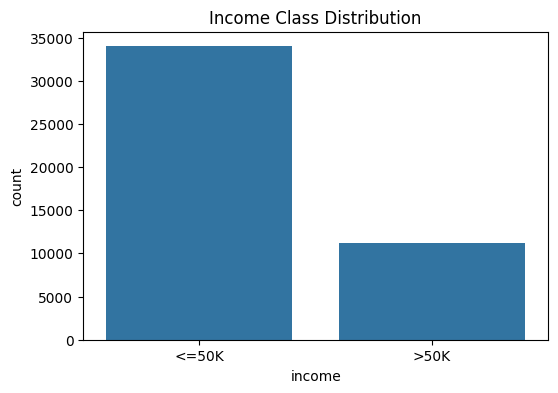

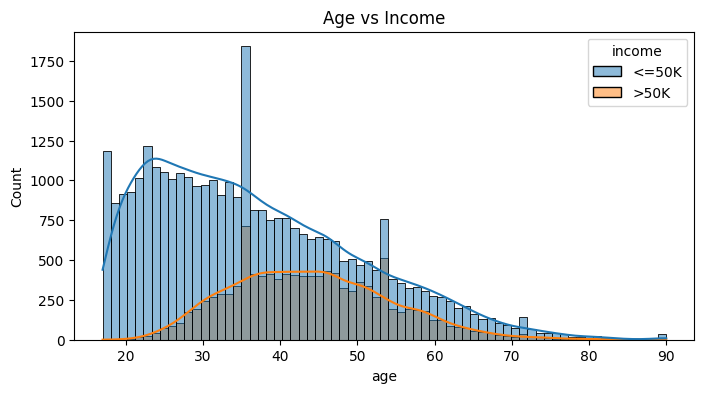

Accuracy Score: 0.8520199225235197

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      6842
           1       0.73      0.63      0.67      2193

    accuracy                           0.85      9035
   macro avg       0.81      0.78      0.79      9035
weighted avg       0.85      0.85      0.85      9035


 Confusion Matrix:
 [[6322  520]
 [ 817 1376]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Internship Project - Salary Prediction using ML
Model: Random Forest | Accuracy Achieved: 85.20%
Dataset: Cleaned Adult Income (UCI)
Delivered by: Dharini Kavya ✅


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# STEP 2: LOAD DATA
df = pd.read_csv('/content/adult 3.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

print("Data shape after cleaning:", df.shape)
df.head()


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income')
plt.title("Income Class Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='age', hue='income', kde=True)
plt.title("Age vs Income")
plt.show()


le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


joblib.dump(model, 'salary_predictor_model.pkl')

from google.colab import files
files.download('salary_predictor_model.pkl')

print("Internship Project - Salary Prediction using ML")
print("Model: Random Forest | Accuracy Achieved: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Dataset: Cleaned Adult Income (UCI)")
print("Delivered by: Dharini Kavya ")



XGBoost Algorithm

Data loaded and cleaned.
(45175, 15)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:59:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model trained.
Accuracy Score: 0.8620918649695628

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6842
           1       0.75      0.65      0.70      2193

    accuracy                           0.86      9035
   macro avg       0.82      0.79      0.80      9035
weighted avg       0.86      0.86      0.86      9035


 Confusion Matrix:
 [[6369  473]
 [ 773 1420]]


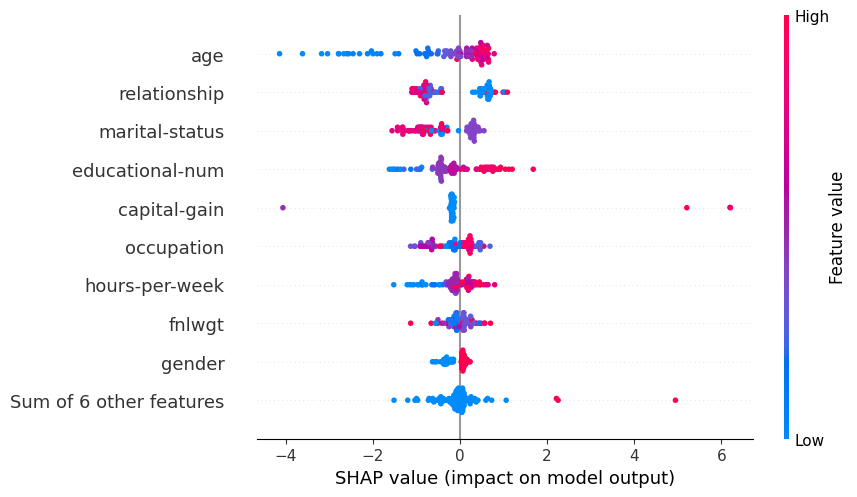

Internship Project - XGBoost Salary Prediction
Model: XGBoost with Feature Engineering (hours_per_age)
Final Accuracy: 86.21%
Tools: pandas, seaborn, xgboost, SHAP
Created by: Dharini Kavya


In [14]:
!pip install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import xgboost as xgb
df = pd.read_csv('/content/adult 3.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

print("Data loaded and cleaned.")
print(df.shape)


df['hours_per_age'] = df['hours-per-week'] / df['age']
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

print("XGBoost model trained.")

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

!pip install shap
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test[:100])

shap.plots.beeswarm(shap_values)
print("Internship Project - XGBoost Salary Prediction")
print("Model: XGBoost with Feature Engineering (hours_per_age)")
print("Final Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Tools: pandas, seaborn, xgboost, SHAP")
print("Created by: Dharini Kavya")








In [15]:
import joblib

joblib.dump(model, 'xgboost_salary_model.pkl')
from google.colab import files
files.download('xgboost_salary_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import gradio as gr
import joblib
import pandas as pd

# Load model
model = joblib.load("xgboost_salary_model.pkl")

# Define prediction function
def predict_salary(age, education_num, hours_per_week, capital_gain, capital_loss,
                   workclass, occupation, relationship):

    workclass_map = {'Private': 3, 'Self-emp-not-inc': 4, 'Local-gov': 1, 'State-gov': 5}
    occupation_map = {'Tech-support': 12, 'Craft-repair': 2, 'Other-service': 9, 'Sales': 10}
    relationship_map = {'Husband': 0, 'Not-in-family': 1, 'Own-child': 2, 'Unmarried': 4}

    workclass_val = workclass_map[workclass]
    occupation_val = occupation_map[occupation]
    relationship_val = relationship_map[relationship]
    hours_per_age = hours_per_week / age

    input_df = pd.DataFrame([[
        age, workclass_val, 0, 0, education_num, 0,
        occupation_val, relationship_val, 0, 0,
        capital_gain, capital_loss, hours_per_week, 0,
        hours_per_age
    ]], columns=[
        'age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
        'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
        'hours-per-week', 'native-country', 'hours_per_age'
    ])

    pred = model.predict(input_df)[0]
    return ">50K" if pred == 1 else "<=50K"

# UI elements
gr.Interface(
    fn=predict_salary,
    inputs=[
        gr.Slider(18, 80, value=30, label="Age"),
        gr.Slider(1, 16, value=10, label="Education Level"),
        gr.Slider(1, 100, value=40, label="Hours per Week"),
        gr.Number(label="Capital Gain", value=0),
        gr.Number(label="Capital Loss", value=0),
        gr.Dropdown(["Private", "Self-emp-not-inc", "Local-gov", "State-gov"], label="Workclass"),
        gr.Dropdown(["Tech-support", "Craft-repair", "Other-service", "Sales"], label="Occupation"),
        gr.Dropdown(["Husband", "Not-in-family", "Own-child", "Unmarried"], label="Relationship"),
    ],
    outputs="text",
    title="Salary Prediction App",
    description="Predicts if salary is >50K or <=50K"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ca5c958b2bd2f115f4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
